# Исследование рынка недвижимости Санкт-Петербурга

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-и-изучение-пропущенных-значений-в-столбцах:" data-toc-modified-id="Поиск-и-изучение-пропущенных-значений-в-столбцах:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск и изучение пропущенных значений в столбцах:</a></span></li><li><span><a href="#Изменение-типов-данных:" data-toc-modified-id="Изменение-типов-данных:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных:</a></span></li><li><span><a href="#Добавление-дополнительных-столбцов" data-toc-modified-id="Добавление-дополнительных-столбцов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавление дополнительных столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-скорости-продажи-квартир" data-toc-modified-id="Анализ-скорости-продажи-квартир-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ скорости продажи квартир</a></span></li><li><span><a href="#Выявление-факторов-наиболее-влияющих-на-общую-(полную)-стоимость-объекта?" data-toc-modified-id="Выявление-факторов-наиболее-влияющих-на-общую-(полную)-стоимость-объекта?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выявление факторов наиболее влияющих на общую (полную) стоимость объекта?</a></span></li><li><span><a href="#Расчёт-средней-цены-одного-квадратного-метра" data-toc-modified-id="Расчёт-средней-цены-одного-квадратного-метра-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчёт средней цены одного квадратного метра</a></span></li><li><span><a href="#Зависимость-стоимости-объектов-от-расстояния-до-центра-города." data-toc-modified-id="Зависимость-стоимости-объектов-от-расстояния-до-центра-города.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Зависимость стоимости объектов от расстояния до центра города.</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

## Обзор данных

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [413]:
data = pd.read_csv('D:\Jypiter\datasets\\real_estate_data.csv', sep='\t')

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [415]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

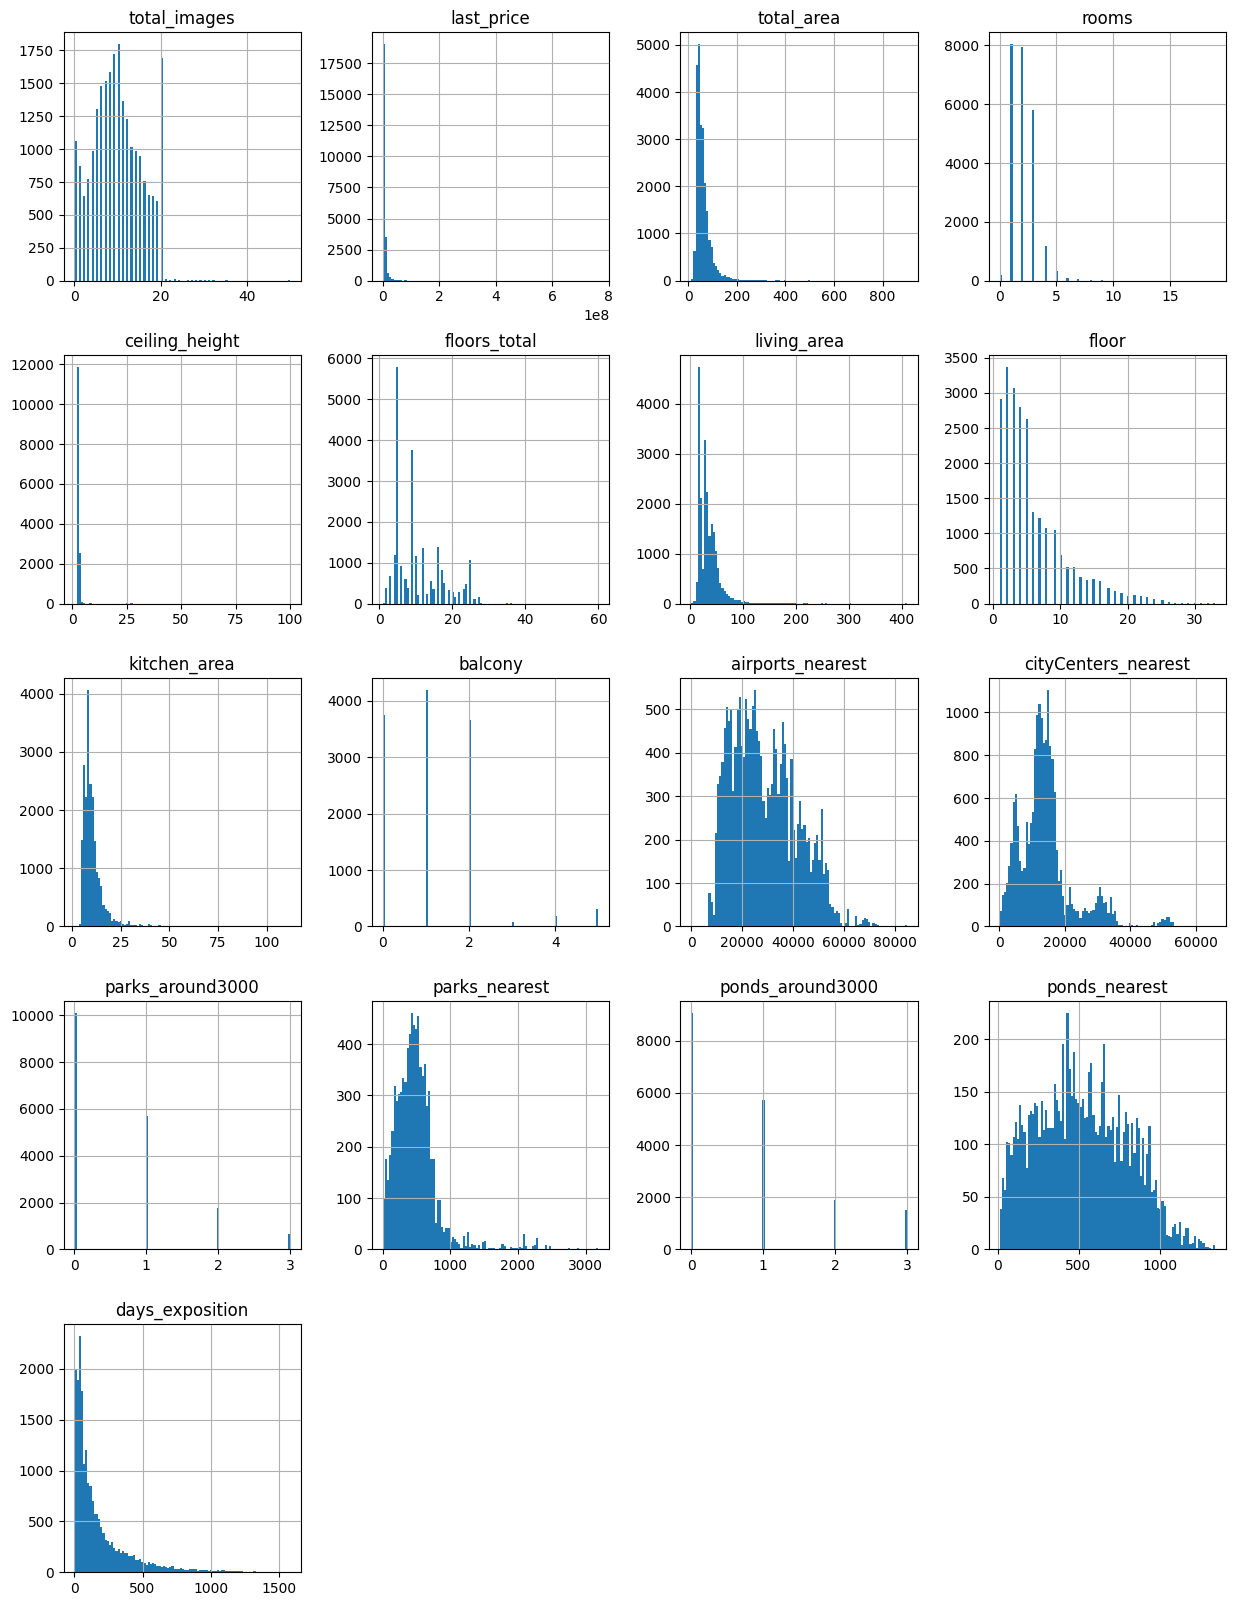

In [416]:
data.hist(bins=100, figsize=(15,20)) 

In [417]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [418]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод (пункт 1):** Данные требуют предобработки. В частности удаления пропусков (возможно, дубликатов), изменения типов и избавления от нереалистичных значений. 

## Предобработка данных

### Поиск и изучение пропущенных значений в столбцах:

Вызовем и отсортируем суммы пропусков в столбцах. Далее пройдемся по каждому.\
Оценим возможность восстановления данных или удаления строк.\
Сразу обратим внимание на крайние значения. Избавимся от нереалистичных значений.

In [419]:
#Проверяем количетсво пропусков  в столбцах с данными

data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Видим пропуски в 14 из 22 столбцов.\
В столбцах, где представляется возможным, восстановим данные.         

**Столбец 'is_appartment'**

90% данных - пропуски.

Принимая во внимание то, что в столбце есть и True, и False, и Nan нельзя уверенно заявить что какое-то из булевых значений полностью заменилось на Nan. Скорее всего данные значения вообще не были заполнены изначально

Столбец 'is_appartment' нет возможности восстановить, используя другие табличные данные. К тому же в дальнейших заданиях он не понадобится.
Предложение: удалить столбец. Он нам попросту ничего не даст

In [420]:
print(data['is_apartment'].value_counts())
data = data.drop(columns='is_apartment',axis=1) # удаление столбца is_appartment
data.head(5)

False    2725
True       50
Name: is_apartment, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Столбцы 'parks_nearest' и 'ponds_nearest'**

Расстояния до объектов можно было бы заполнить, опираясь на другие табличные данные, если бы дело касалось менее распространенных объектов, чем парки. Например, если бы был вопрос о расстоянии до аэропорта, то можно было бы присвоить медианное значение после группировки по населённым пунктам. 

В данном случае нет возможности восстановить, используя другие табличные данные. Оставим, как есть.

In [421]:
print(data['parks_nearest'].describe())

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [422]:
print(data['ponds_nearest'].describe())

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


**Столбец 'balcony'** 

In [423]:
print(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


Можно предположить, что если пользователь не стал заполнять этот пункт, то балкона у него нет. 
Заполним все пропусками значениями '0':

In [424]:
print('Количество пропусков до:', data['balcony'].isna().sum())

data.loc[data['balcony'].isna(), 'balcony'] = 0 # Заполнение пропусков значениями 0

print('Количество пропусков после:', data['balcony'].isna().sum()) # Проверка устранения пропусков

Количество пропусков до: 11519
Количество пропусков после: 0


**Столбец 'ceiling_height'**

In [425]:
print(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


При медиане в 2,65 метра видно, что есть значения и в 100 метров, что для данного параметра странно.
Из наших соображений, что максимальная реальная потолка может достигать 6 метров в двухэтажной квартире, то посмотрим, сколько каких значений есть выше 6 метров.

In [426]:
print('Количество повторений для каждого уникального значения выше 6')
print(data['ceiling_height'][data['ceiling_height'] > 6].sort_values().value_counts())

Количество повторений для каждого уникального значения выше 6
27.0     8
25.0     7
8.0      3
32.0     2
14.0     1
20.0     1
10.3     1
22.6     1
27.5     1
24.0     1
8.3      1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64


Видно, что много значений находятся в интервалах от 20 до 30 метров. Есть предположение, что это ошибка ввода, где пользователь не поставил запятую и ввёл 2,5 как 25. \
Разделим на 10 значения из интервала [20-30] метров.\
Значения в интервале [6; 20) и [30; +бесконечность) метров заменим на медианные ~2,7 метра. \
Пропуски заполним медианными значениями.

In [427]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 30), 'ceiling_height'] = data['ceiling_height'] / 10
data.loc[(data['ceiling_height'] > 6) & (data['ceiling_height'] < 20) | (data['ceiling_height'] > 30), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

data['ceiling_height'].describe() # Проверка отсутствия значений более 6м

count    23699.000000
mean         2.696647
std          0.221655
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

Столбец **airports_nearest**

In [428]:
print('Количество пропусков в столбце:', data['airports_nearest'].isna().sum())
print()
print('Описание множества')
print(data['airports_nearest'].describe())

Количество пропусков в столбце: 5542

Описание множества
count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


Проанализировав значения видим максимальные значения около 85 км, а минимальное 0 (возможно объект находится в непосредственной близости от аэропорта). Значений менее 5 км всего лишь одно, что увязывается с логикой, что аэропорт находится в стороне от жилых зданий.

Заполним пропуски медианными значениями от населенного пункта, в котором сдаётся объект, но для начала наведем порядок в столбце: 'locality_name'

In [429]:
print('Количество объектов с аэропортом ближе 5 км:')
print(data['airports_nearest'][data['airports_nearest'] < 5000].sort_values().value_counts())

Количество объектов с аэропортом ближе 5 км:
0.0    1
Name: airports_nearest, dtype: int64


**Столбец 'locality_name'**

In [430]:
print('Количество пропусков в столбце:', data['locality_name'].isna().sum())
print()
print('Описание множества')
print(data['locality_name'].describe())
print()
print('Количество значений для каждого названия насленного пункта:')
print(data['locality_name'].sort_values().value_counts())

Количество пропусков в столбце: 49

Описание множества
count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Количество значений для каждого названия насленного пункта:
Санкт-Петербург                     15721
посёлок Мурино                        522
посёлок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
деревня Рапполово                       1
посёлок Платформа 69-й километр         1
деревня Мануйлово                       1
деревня Терпилицы                       1
садовое товарищество Новая Ропша        1
Name: locality_name, Length: 364, dtype: int64


1. Заменим заглавные буквы на строчные, а "ё" на "е".
2. Создадим дополнительный столбец 'locality_group' для дальнейшего анализа.
3. Приведём похожие названия населннных пунктов к одному виду, убрав из названий населённых пунктов приписки (село, посёлок и т.п.).
4. Удалим строки с пропусками в столбце ['new_locality_name'], т.к. их менее 1% от общего числа.

In [431]:
print('Количество уникальных значений до:', data['locality_name'].sort_values().nunique())

data['new_locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е') #Приводим к нижнему риегистру, меняем "ё" на "е"

def grouping(name): #Функция для отдельного столбца с группировкой по типам населенных пунктов
    if pd.isna(name):    
        return('unknown')
    if 'санкт'in name:    
        return('крупный_город')
    if any (x in name for x in ['кроншт', 'гатч', 'пушк', 'шлис', 'волх', #Перечисляем все названия городов, чтобы группировка произошла корректнее
                                'всевол', 'боксит', 'выбор', 'высоц', 'ломон',
                                'петергоф', 'приозерск', 'павлов', 'сестро', 'примор',
                               'светогор', 'приозерск', 'тихвин' 'тосно', 'сертоло',
                                'соснов', 'сяльстр', 'сланц' 'лодейн', 'пикал',]):    
        return('мелкий_город')
    if 'посел' or 'коттедж' or 'котедж' in name:    
        return('поселок')
    if 'дерев' or 'село' in name:    
        return('деревня/село')
    else:   
        return('другое')
    
    
data['locality_group'] = data['new_locality_name'].apply(grouping) #Присоедиянем столбец с группировкой по типу населенного пункта

#Приводим похожие названия населённных пунктов к единому виду
data['new_locality_name'] = (data['new_locality_name'].str.replace('поселок', '')
                                                      .str.replace('поселок городского типа', '')
                                                      .str.replace('котедж', '')
                                                      .str.replace('коттедж', '')
                                                      .str.replace('село', '')
                                                      .str.replace('садовое товарищество', '')
                                                      .str.replace('садоводческое некоммерческое товарищество', '')
                                                      .str.replace('городской поселок', '')
                                                      .str.replace('городского типа', '')
                                                      .str.replace('деревня', '')
                                                      .str.strip())
                                                                    

data = data.dropna(subset=['new_locality_name'])
print('Количество уникальных значений после:', data['new_locality_name'].sort_values().nunique())


Количество уникальных значений до: 364
Количество уникальных значений после: 317


Получили 317 уникальных значений вместо 364 начальных



Вернёмся к столбцу **airports_nearest**

Была идея заполнить пропуски в расстояних до аэропорта медианным значением по населенному пункту. Однако в большем количества населенных пунктов вообще нет ни одного значения. Можно было бы заполнить по тем пунктам, где есть. Однако для дальнейшей работы нам понадобятся только значения по Санкт-Петербургу.

Заполнение медианным значениями выразилось в виде пиков на гистограмме, и было решено оставить, как есть.

**Столбец 'cityCenters_nearest'**

In [432]:
print('Количество пропусков до:', data['cityCenters_nearest'].isna().sum())

Количество пропусков до: 5511


В данном случае примем расстояние до центра города по медианному значению, сгруппировав данные по населенным пунктам.

In [433]:
print('Количество пропусков до:', data['cityCenters_nearest'].isna().sum())
print()

median6 = data['cityCenters_nearest'][data['new_locality_name'] != 'санкт-петербург'].median() # Высчитываем медианное расстояние до аэропорта в Санкт-Петеребурге
print('Медианное расстояние до аэропорта в пригородах Санкт-Петеребурге:', median6)
print()

data.loc[(data['new_locality_name'] != 'санкт-петербург') & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = median6 # Заполняем медианным значением пропуски в столбце расстояния до аэропорта по объектам Санкт-петербурга
print('Количество пропусков после:', data['cityCenters_nearest'].isna().sum())

Количество пропусков до: 5511

Медианное расстояние до аэропорта в пригородах Санкт-Петеребурге: 30371.0

Количество пропусков после: 61


**Столбцы 'ponds_around3000', 'parks_around3000'**

In [434]:
print('Количество пропусков:', data['parks_around3000'].isna().sum())

Количество пропусков: 5510


In [435]:
print('Количество пропусков до:', data['ponds_around3000'].isna().sum())

Количество пропусков до: 5510


In [436]:
print(data['parks_around3000'].describe())

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


In [437]:
print(data['ponds_around3000'].describe())

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


Пропуски в данных столбцах нет возможности восстановить, т.к. в каждом населенном пункте можт быть много прудов и парков. А в разных районах каждого насленного пункта их может быть разная плотность.

В столбцах 'ponds_around3000' и  'parks_around3000' аномальных значений нет. Всё в пределах от 0 до 3.

**Столбец 'days_exposition'**

In [438]:
print('Количество пропусков:', data['days_exposition'].isna().sum())
print()
print(data['days_exposition'].describe())

Количество пропусков: 3180

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


Значения в промежутке от 1 дня до 1580 дней (~5 лет).
Построив гистограммы видим, равномерное уменьшение количества объектов со временем (распредление Пуассона).

<AxesSubplot:>

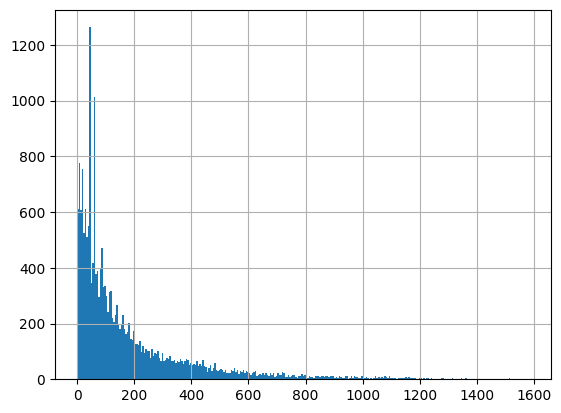

In [439]:
data['days_exposition'].hist(bins=300)

In [440]:
data2 = data[data['days_exposition'].isna()]
data2['first_day_exposition'].value_counts().head(10)

2019-04-22T00:00:00    46
2019-04-18T00:00:00    44
2019-04-04T00:00:00    36
2019-04-29T00:00:00    36
2019-04-08T00:00:00    36
2019-04-17T00:00:00    35
2019-04-26T00:00:00    35
2019-04-15T00:00:00    34
2019-04-16T00:00:00    32
2019-04-24T00:00:00    32
Name: first_day_exposition, dtype: int64

Проверив столбец  c датой размещения, выяснили, что причина пропуска параметра days_exposition - то, что объявление еще не снято. Пропуски не заполняем, анализирировать данный параметр будем без строк с пропусками

Столбцы <b>kitchen_area</b> и <b>living_area</b>

Есть идея построить зависимости площадей кухни и жилой площади от общей площади, и через функцию заполнить пропуски там, где есть жилая площадь, но нет площади кухни.

Значение общей площади есть во всех строках. Оценив зависимости, видим высокие коэффициенты корреляции, особенно жилой площади от общей площади.


'kitchen_area' имеет 2278 пропусков
'living_area' имеет 1903 пропусков

In [441]:
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [442]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

0.9395341841776423
0.6088787817469412


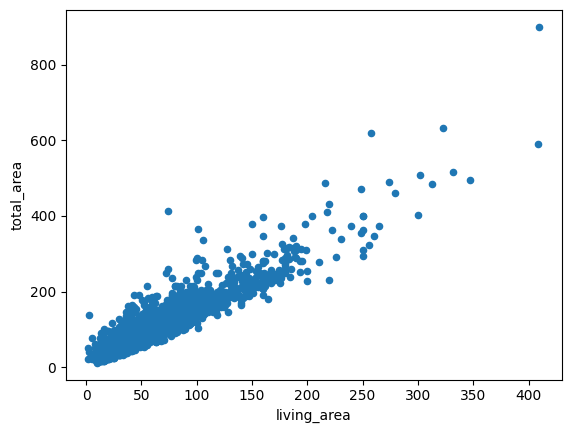

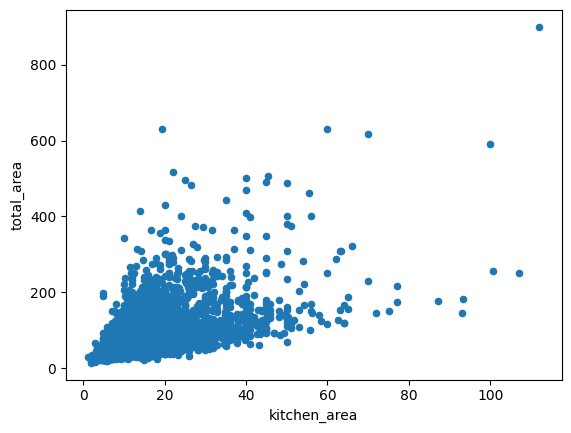

In [443]:
print(data['living_area'].corr(data['total_area'])) #отображаем коэффициент корреляици
print(data['kitchen_area'].corr(data['total_area'])) #отображаем коэффициент корреляици

#pd.plotting.scatter_matrix(data)
data.plot(x='living_area', y='total_area', kind='scatter') #Строим точечный график
data.plot(x='kitchen_area', y='total_area', kind='scatter') #Строим точечный график
plt.show()

In [444]:
data_copy = data.dropna(subset=['kitchen_area', 'living_area']) #создаем временный датафрейм для получения коэффициентов регрессии 
a = np.polyfit(data_copy['total_area'], data_copy['living_area'], 1) #Получаем коэффициенты регрессии
a 

array([ 0.59685561, -1.49351668])

In [445]:
data_copy = data.dropna(subset=['kitchen_area', 'living_area']) #создаем временный датафрейм для получения коэффициентов регрессии 
b = np.polyfit(data_copy['total_area'], data_copy['kitchen_area'], 1) #Получаем коэффициенты регрессии
b

array([0.10313769, 4.27171096])

In [446]:
data['living_area_func'] = a[1] + a[0] * data['total_area'] #Подставляем коэффициенты регрессии
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area_func'] #Заполняем значениями пропуски

data['kitchen_area_func'] = b[1] + b[0] * data['total_area'] #Подставляем коэффициенты регрессии
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area_func'] #Заполняем значениями пропуски
print('Количество пропусков после:')
data[['living_area', 'kitchen_area']].isna().sum()



Количество пропусков после:


living_area     0
kitchen_area    0
dtype: int64

**Последний столбец 'floors_total'**

In [447]:
print('Количество пропусков до:', data['floors_total'].isna().sum())
print()

data['floors_total'].describe()

Количество пропусков до: 85



count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Дом в Кронштадте в 60 этажей выглядит неправдоподобно. Возможно пользователь ошибся при вводе значения. Перезапишем датафрейм без этой строки.
Пропуски заполнить не представляется возможным, однако их всего несколько десятков, поэтому удалим все строки, где есть пропуски в данном столбце.

На гистограмме видны 2 пика для 5- и 9-этажек, что коррелирует с реальностью.

Количество пропусков после: 0


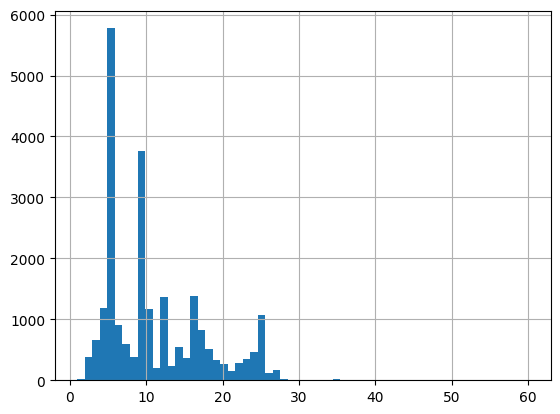

In [448]:
data['floors_total'].hist(bins=60)

data = data[data['floors_total'] < 60] #Перезаписываем датафрейм без строки с 60-этажным домом. Данной командой также удаляем пропуски 
data.dropna(subset=['floors_total']).reset_index(drop=True)

print('Количество пропусков после:', data['floors_total'].isna().sum())

### Изменение типов данных:
   

In [449]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23564 non-null  int64  
 1   last_price            23564 non-null  float64
 2   total_area            23564 non-null  float64
 3   first_day_exposition  23564 non-null  object 
 4   rooms                 23564 non-null  int64  
 5   ceiling_height        23564 non-null  float64
 6   floors_total          23564 non-null  float64
 7   living_area           23564 non-null  float64
 8   floor                 23564 non-null  int64  
 9   studio                23564 non-null  bool   
 10  open_plan             23564 non-null  bool   
 11  kitchen_area          23564 non-null  float64
 12  balcony               23564 non-null  float64
 13  locality_name         23564 non-null  object 
 14  airports_nearest      18040 non-null  float64
 15  cityCenters_nearest

При анализе типов данных методом info() выяснилось, что некоторые дискретные значения имеют тип float.
Измененим их тип на int

In [450]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23564 non-null  int64  
 1   last_price            23564 non-null  float64
 2   total_area            23564 non-null  float64
 3   first_day_exposition  23564 non-null  object 
 4   rooms                 23564 non-null  int64  
 5   ceiling_height        23564 non-null  float64
 6   floors_total          23564 non-null  int32  
 7   living_area           23564 non-null  float64
 8   floor                 23564 non-null  int64  
 9   studio                23564 non-null  bool   
 10  open_plan             23564 non-null  bool   
 11  kitchen_area          23564 non-null  float64
 12  balcony               23564 non-null  int32  
 13  locality_name         23564 non-null  object 
 14  airports_nearest      18040 non-null  float64
 15  cityCenters_nearest

C:\Users\andru\AppData\Local\Temp\ipykernel_12772\3906898572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data['floors_total'].astype(int)
C:\Users\andru\AppData\Local\Temp\ipykernel_12772\3906898572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].astype(int)


### Добавление дополнительных столбцов

In [451]:
data.loc[:, 'squared_metr_price'] = data.loc[:, 'last_price'] / data.loc[:, 'total_area'] 

data.loc[:, 'first_day_exposition'] = pd.to_datetime(data.loc[:, 'first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'  )
data.loc[:, 'number_day'] = data.loc[:, 'first_day_exposition'].dt.weekday
data.loc[:, 'number_month'] = data.loc[:, 'first_day_exposition'].dt.month
data.loc[:, 'number_year'] = data.loc[:, 'first_day_exposition'].dt.year

def type_floor(row): #Первый этаж обозначил 1, последний 3, другой 2. Иначе не строился точечный график в 4-ом задании.
    if row['floor'] == 1:
        return 1
    if row['floor'] == row['floors_total']:
        return 3
    else:
        return 2    
    
data.loc[:, 'type_floor'] = data.apply(type_floor, axis=1)
data.loc[:, 'cityCenters_nearest'] = data.loc[:, 'cityCenters_nearest'] / 1000
data.loc[:, 'cityCenters_nearest'] = data.loc[:, 'cityCenters_nearest'].round(decimals=0)

data.head(10)

C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,days_exposition,new_locality_name,locality_group,living_area_func,kitchen_area_func,squared_metr_price,number_day,number_month,number_year,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,NaN,санкт-петербург,крупный_город,62.966889,15.410582,120370.370370,3,3,2019,2
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,81.0,шушары,поселок,22.619450,8.438474,82920.792079,1,12,2018,1
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,558.0,санкт-петербург,крупный_город,31.930398,10.047422,92785.714286,3,8,2015,2
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,93.406526,9,False,...,424.0,санкт-петербург,крупный_город,93.406526,20.670604,408176.100629,4,7,2015,2
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,121.0,санкт-петербург,крупный_город,58.192045,14.585480,100000.000000,1,6,2018,2
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,55.0,городской янино-1,поселок,16.650894,7.407097,95065.789474,0,9,2018,2
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,155.0,парголово,поселок,20.769198,8.118747,99195.710456,3,11,2017,2
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.241345,22,False,...,NaN,санкт-петербург,крупный_город,41.241345,11.656370,110544.692737,3,4,2019,2
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,189.0,мурино,поселок,18.298215,7.691757,87454.764777,2,5,2018,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,289.0,санкт-петербург,крупный_город,34.914676,10.563110,88524.590164,6,2,2017,2


## Исследовательский анализ данных

Необходимо изучить следующие параметры объектов:
    
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**общая площадь:** Логнормальное распределение с удлинением хвоста в правую сторону. Основная масса объектов имеют площадь от 30 до 100 м2. Видны несколько локальной шпилей. Могут означать типовые, более распространенные варианты площади в квартирах.

**жилая площадь:** Логнормальное распределние. Имеет два выраженных пика. Возможность внутри данных есть две независимые группы, которые бы стоило отделить.

**площадь кухни:** Классическое логнормальное распределение. БОльшая часть кухонь имеет площадь 6-11 м2

**цена объекта:** Логнормальное распредление. Небольшие шпили - тяга человека к круглым числам. Стоимости квартир находятся в диапазоне от 1.22 до 763 млн рублей с медианой в 4.65 млн рублей. Отсюда уже можно сложить первое представление о стоимости квартиры в Санк-Петербурга.

**количество комнат:** Первый интересный факт- есть квартиры с количеством комнат 0. Посмотрев head сложилось впечатление, что это маленькие квартиры или коттеджы. Возможно владельцы действуют, как в Америке, где зал не считается комнатой. Перевели все объекты с 0 комнатами к объектам с 1-ой комнатой. Теперь видно, что больше всего однушек и двушек. Далее по убыванию есть немалое количество 3-х и 4-х комнатных. 4+ комнат уже встречается гораздо реже.

**высота потолков:** В основном высота потолков 2,6-2,8 метров. Есть также квартиры с высокими потолками. 3-3,2 метра. А также на предыдущем этапе мы уже убирали аномальные значения. [20; 30] разделили на 10, а (6:20; +бесконечность) заменили на медианное значение 2,65.

**этаж квартиры:** Видим распределние Пуассона. Наибольшее количество квартир на этажах: 2, 3, 1, 4, 5. Здесь интересно, что не на первом этаже. Всё же в выборке есть коттеджи. Но в первой пятерке сомнений нет (привет хрущевкам). Максимальное значение в 33 этажа. Несколько значений в 40+ этажей убрали на этапе предобработки (в реальности в Питере нет домов по 60 этажей, не то что в Кронштадте)

**тип этажа квартиры («первый», «последний», «другой»):** Ожидаемо наибольшее количество квартир расположены не на первом, и не на последнем этаже.

**общее количество этажей в доме:** Здесь ТОП выглядит следующим образом: 5, 9, 16, 12, 4, что также соотоносится с реальностью.

**расстояние до центра города в метрах:** По Питеру как уже считали ранее среднее расстояние состовляло ~12 км, по пригородам ~30 км. На гистограмме видны локальные пики, свидетельствующие, что на опредленном расстоянии есть город со множеством объектов.

**расстояние до ближайшего аэропорта:** Распределение близкое к нормальному. Почти все значения лежат в диапазоне от 10 до 60 км.

**расстояние до ближайшего парка:** Левая часть плавная, правая - скошенная. Означает, что в большинстве случае до ближайшего парка не более 800 метров.

**день и месяц публикации объявления:**. Распределение Пуассона. Параболическое снижение при перемещении в правую сторону. Подробнее об этом столбце в пункте 4.2.

count    23564.000000
mean        60.323453
std         35.657685
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

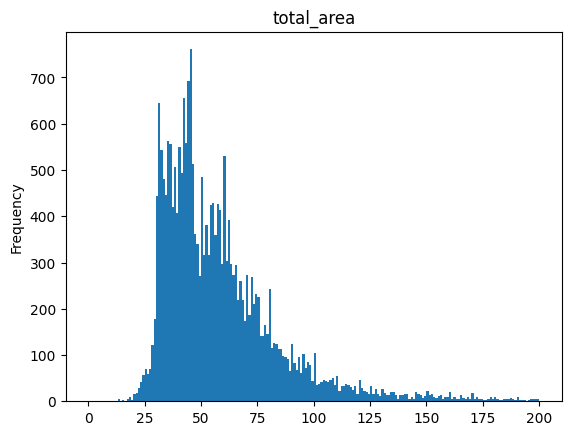

In [452]:
data['total_area'].plot(kind='hist', bins=200, range=(0,200), title='total_area')
data['total_area'].describe()

count    23564.00000
mean        34.60317
std         22.48318
min          2.00000
25%         19.00000
50%         30.00000
75%         42.10000
max        409.70000
Name: living_area, dtype: float64

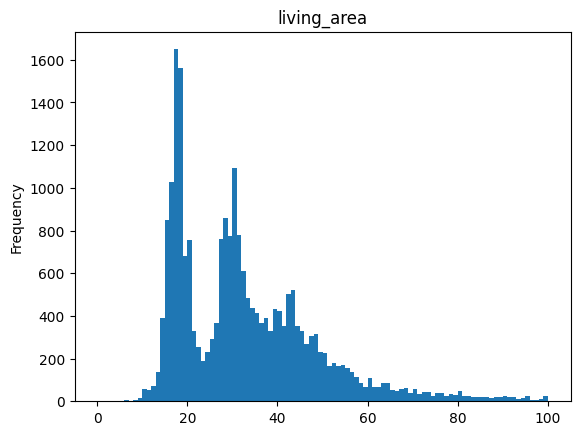

In [453]:
data['living_area'].plot(kind='hist', bins=100, range=(0,100), title='living_area')
data['living_area'].describe()

count    23564.000000
mean        10.518748
std          5.766073
min          1.300000
25%          7.100000
50%          9.100000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

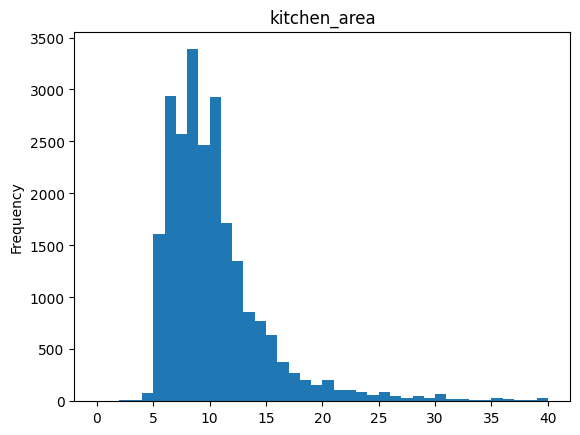

In [454]:
data['kitchen_area'].plot(kind='hist', bins=40, range=(0,40), title='kitchen_area')
data['kitchen_area'].describe()

count    2.356400e+04
mean     6.540175e+06
std      1.091115e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

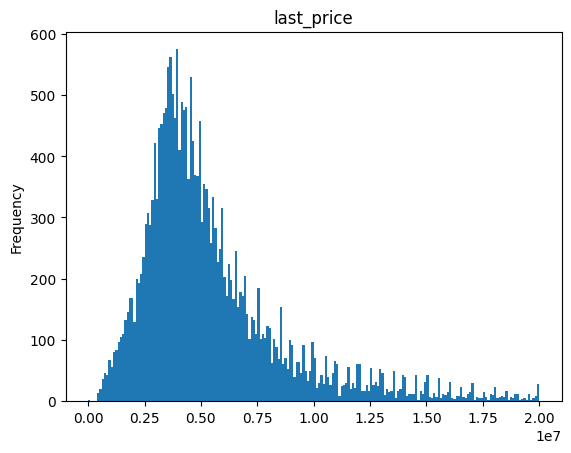

In [455]:
data['last_price'].plot(kind='hist', bins=200, range=(0,20000000), title='last_price')
data['last_price'].describe()

count    23564.000000
mean         2.078892
std          1.066525
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


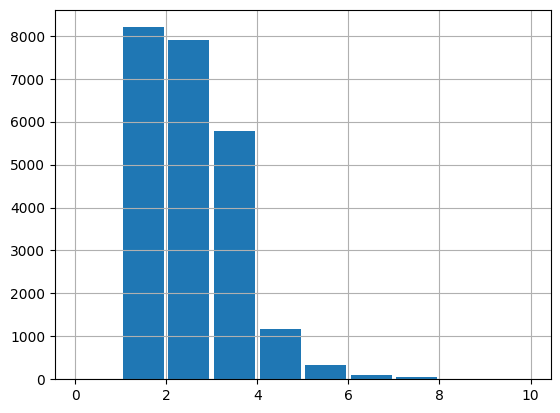

In [456]:
data['rooms'] = data['rooms'].astype(int)

data.loc[data['rooms'] == 0,'rooms'] = 1 #Объекты с нулем комнат обратили в однокмонатные
data['rooms'].hist(bins=10, range=(0,10), rwidth= .9)
print(data['rooms'].describe())

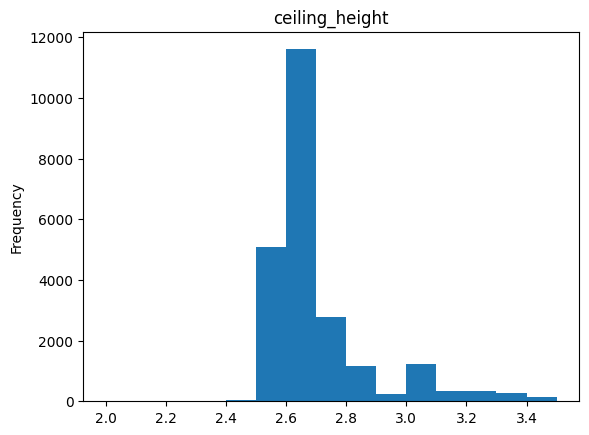

In [457]:
data['ceiling_height'].plot(kind='hist', bins=15, range=(2,3.5), title='ceiling_height')
plt.show()

count    23564.000000
mean         5.878204
std          4.871573
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


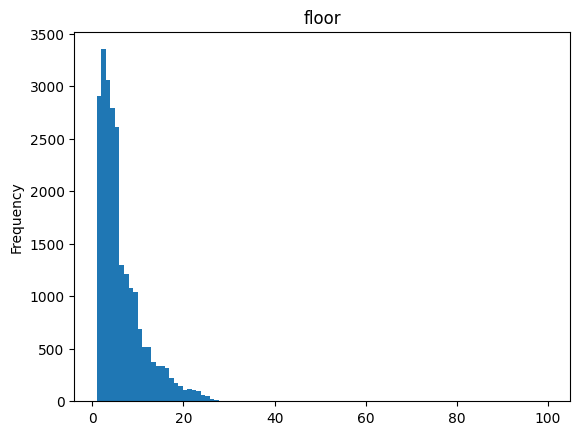

In [458]:
data['floor'].plot(kind='hist', bins=100, range=(1,100), title='floor')

print(data['floor'].describe())

count    23564.000000
mean         2.017866
std          0.514257
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: type_floor, dtype: float64


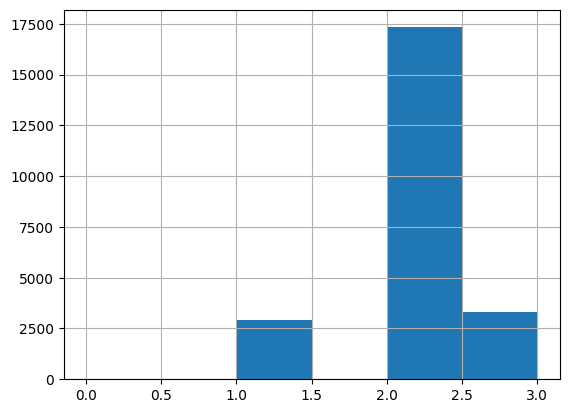

In [459]:
data['type_floor'].hist(bins=6, range=(0,3))

print(data['type_floor'].describe())

count    23564.000000
mean        10.673782
std          6.587131
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

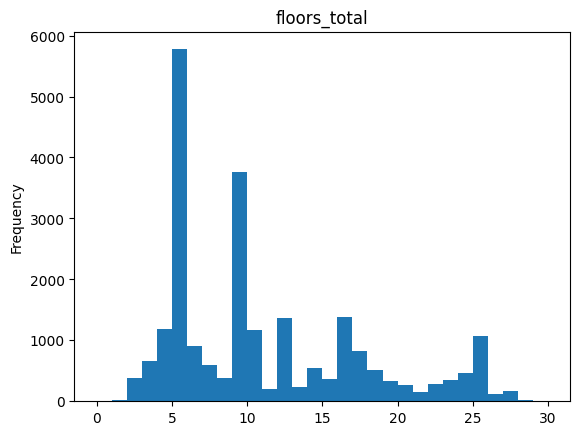

In [460]:
data['floors_total'].plot(kind='hist', bins=30, range=(0,30), title='floors_total')
data['floors_total'].describe()

count    23504.000000
mean        17.845728
std         10.078188
min          0.000000
25%         11.000000
50%         15.000000
75%         30.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64


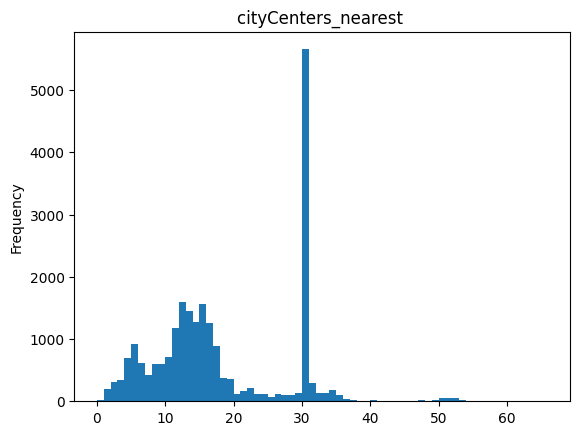

In [461]:
data['cityCenters_nearest'].plot(kind='hist', bins=66, range=(0,66), title='cityCenters_nearest ')

print(data['cityCenters_nearest'].describe())

count    18040.000000
mean     28794.922727
std      12629.517856
min          0.000000
25%      18563.000000
50%      26756.500000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

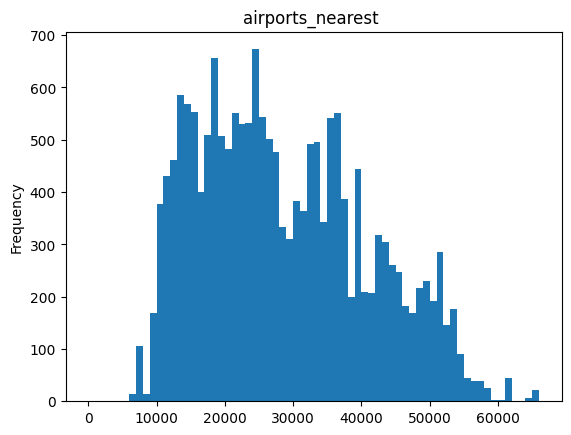

In [462]:
data['airports_nearest'].plot(kind='hist', bins=66, range=(0,66000), title='airports_nearest ')
data['airports_nearest'].describe()

count    8029.000000
mean      490.598954
std       341.590203
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


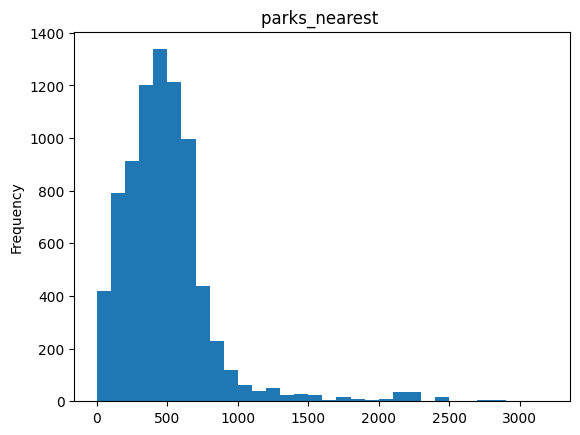

In [463]:
data['parks_nearest'].plot(kind='hist', bins=32, range=(0,3200), title='parks_nearest ')

print(data['parks_nearest'].describe())

### Анализ скорости продажи квартир

Среднее время продажи квартиры составило 181 день.
Медианное: 95 дней.

Видно, что наиболее распространенные значения: 45, 60, 7, 30, 90 дней. Выглядит так, будто это срок размещения, предоставленный сервисом Яндекс.Недвижимости. Вряд ли Яндекс после повторного размещения начинает отсчет заново, тогда бы этих значений было бы еще намного больше. Скорее всего владельцы не всегда сами снимают свои объявления после продажи, и оно может висеть до конца размещения, т.е. до этих самых значений.

Для разнесения обявлений по двум категориям: "быстрые" и "долгие" примем условную границы в медиане. Таким образом быстрее 95 дней будем считать продажу быстрой, в ином случае долгой.

Стоит отметить, что есть объявления, остававшиеся активными целых 5 лет. Такое может быть при продаже очень дорогих квартир или в ситуациях, когда хозяин живёт/сдаёт и параллельно выставляет квартиру на продажу. Посколько срочности нет, он может размещать по высокой цене. Отсюда и долгое время продажи.

45.0    879
60.0    538
7.0     234
30.0    208
90.0    200
Name: days_exposition, dtype: int64


count    20393.000000
mean       180.742117
std        219.738146
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

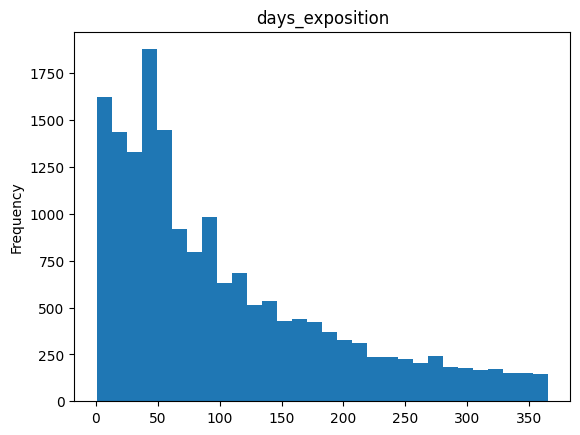

In [464]:
data['days_exposition'].plot(kind='hist', bins=30, range=(1,365), title='days_exposition')

print(data['days_exposition'].value_counts().head())
data['days_exposition'].describe()

### Выявление факторов наиболее влияющих на общую (полную) стоимость объекта?

Выясним, как следующие факторы влияют на стоимость объекта:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Для начала выведем матрицу коэффициентом корреляции для предварительного анализа. Далее матрицы диаграмм рассеяния для основного анализа.

In [465]:
data_cor = data[['last_price',
      'total_area',
      'living_area',
      'kitchen_area',
      'rooms',
      'type_floor',
      'number_day',
      'number_month',
      'number_year']]

data_cor.corr().style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms,type_floor,number_day,number_month,number_year
last_price,1.000000,0.653620,0.586113,0.494260,0.365046,0.058857,0.001360,0.002725,-0.042858
total_area,0.653620,1.000000,0.946869,0.635265,0.760625,0.064637,-0.005676,0.004959,-0.079031
living_area,0.586113,0.946869,1.000000,0.475359,0.830349,0.059130,-0.004813,-0.000125,-0.071172
kitchen_area,0.494260,0.635265,0.475359,1.000000,0.301837,0.050410,-0.006577,0.003224,-0.058049
rooms,0.365046,0.760625,0.830349,0.301837,1.000000,0.025518,-0.004622,-0.002467,-0.054225
type_floor,0.058857,0.064637,0.059130,0.050410,0.025518,1.000000,0.005821,0.008126,0.004758
number_day,0.001360,-0.005676,-0.004813,-0.006577,-0.004622,0.005821,1.000000,0.012020,-0.002991
number_month,0.002725,0.004959,-0.000125,0.003224,-0.002467,0.008126,0.012020,1.000000,-0.271567
number_year,-0.042858,-0.079031,-0.071172,-0.058049,-0.054225,0.004758,-0.002991,-0.271567,1.000000


Из матрицы коэффициентов корреляции сразу же видно, что есть корреляция цены с общей площадью и жилой площадьми. Для более детального исследования построим матрицу диаграмм рассеяния.


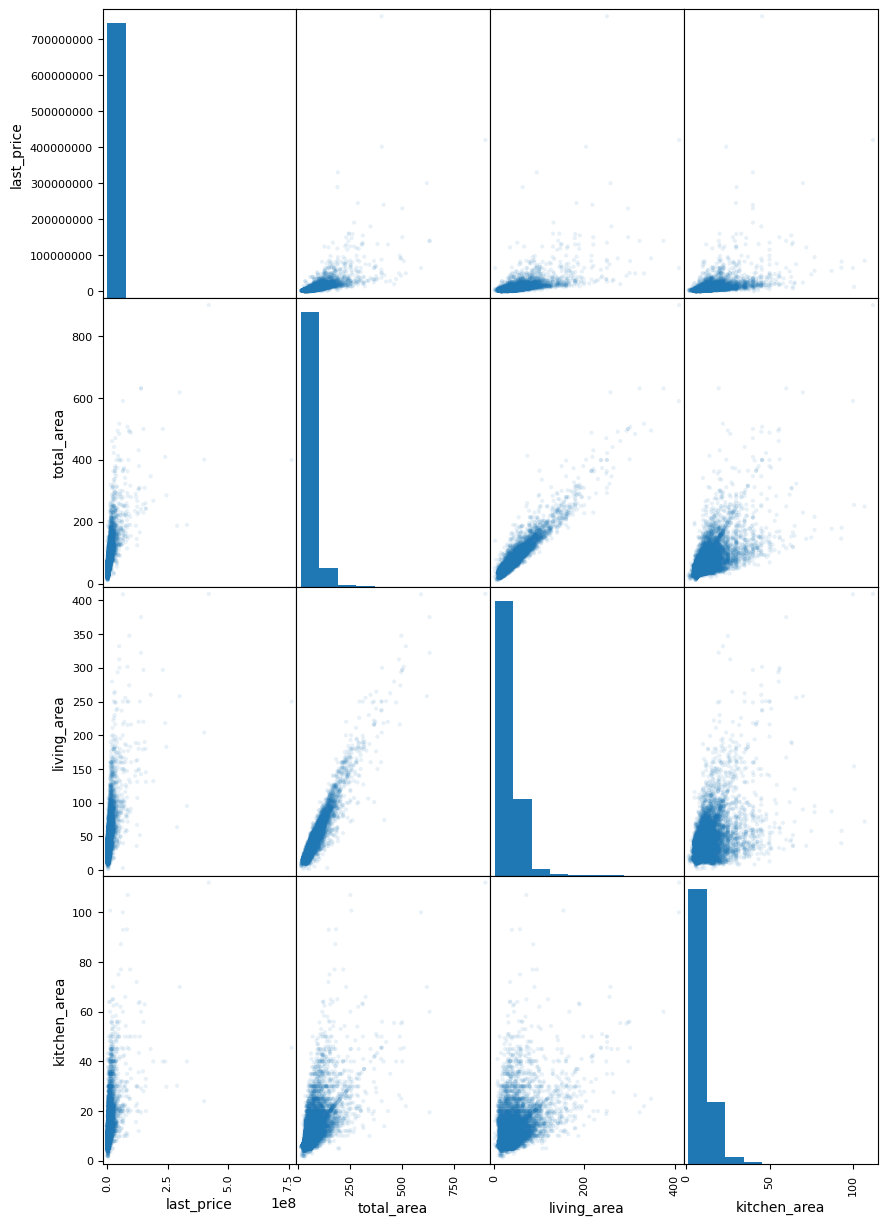

In [466]:
data_squares = data[['last_price','total_area','living_area','kitchen_area',]]
pd.plotting.scatter_matrix(data_squares, figsize=(10,15), alpha=0.1)
plt.show()

Площади влияют на цену. Особенно общая и жилая площадь.

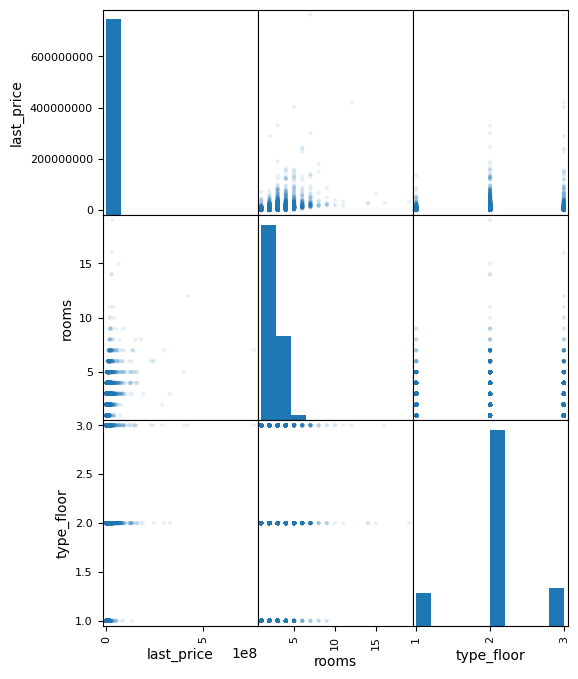

In [467]:
data_rooms_floor = data[['last_price', 'rooms','type_floor']]
pd.plotting.scatter_matrix(data_rooms_floor, figsize=(6,8), alpha=0.1)
plt.show()

Чаще чем больше комнат, тем выше и цена.\
Тип этажа влияет на цену. На первом этаже больше квартир с более низкими ценами.

In [468]:
data_cor = data[['last_price',
      'total_area',
      'living_area',
      'kitchen_area',
      'rooms',
      'type_floor',
      'number_day',
      'number_month',
      'number_year']]

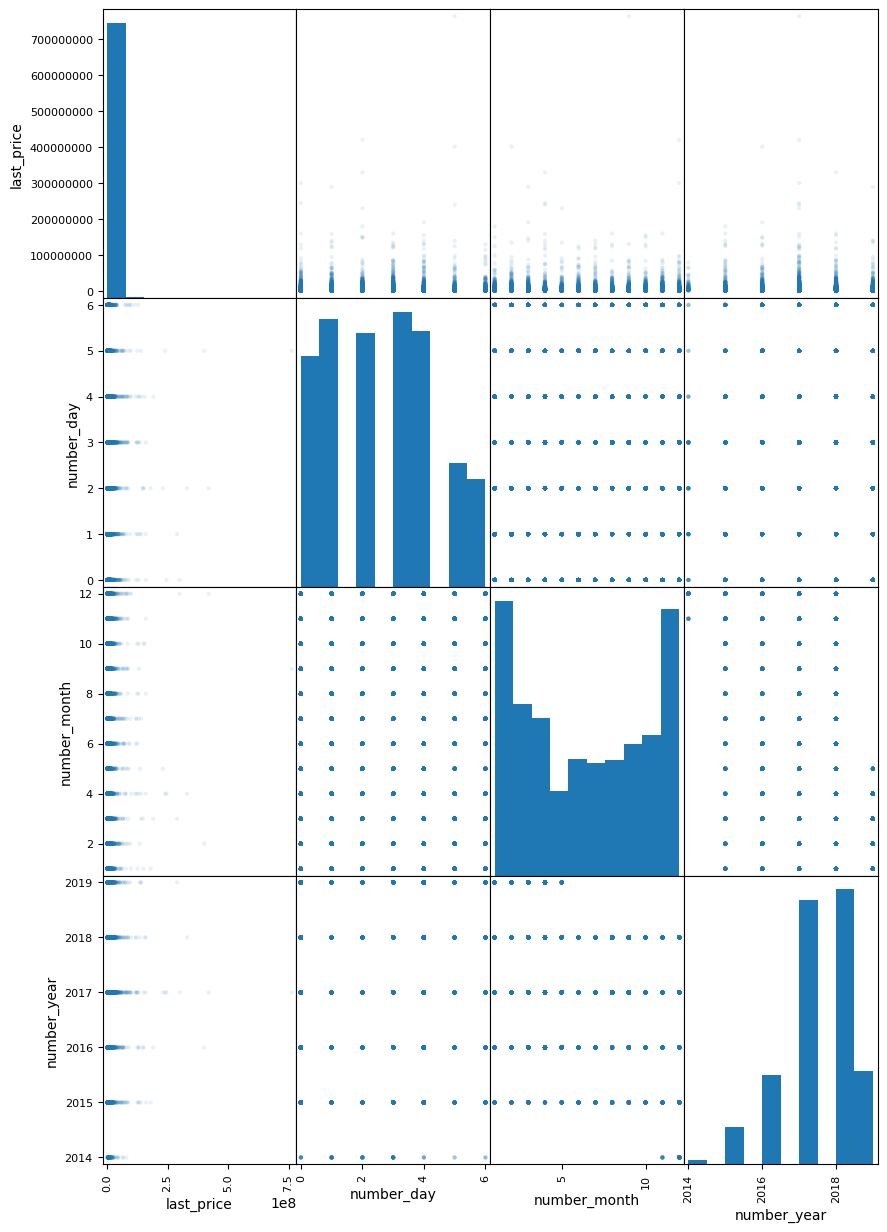

In [469]:
data_dates = data[['last_price','number_day','number_month', 'number_year']]
pd.plotting.scatter_matrix(data_dates, figsize=(10,15), alpha=0.1)
plt.show()

### Расчёт средней цены одного квадратного метра

Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.\
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

1. Сгруппируем данные по населенном пунктам и подсчитаем количество объявлений для каждого.\
2. Отсортируем значения в порядке убывания и выведем ТОП-10.\
3. Составим из названий населенных пунктов список и укажем его в фильтре среза для подсчета средней цены квадратного метра для этих населенных пунктов.

In [470]:
#группируем данные по населенном пунктам и считаем количество объявлений для каждого
#сортируем значения в порядке убывания и выводим ТОП-10.
grouping_locality = data.groupby('new_locality_name')['new_locality_name'].count().sort_values(ascending=False).head(10)

print(grouping_locality)
print()

#Составим из названий населенных пунктов список
locality_list = list(data.groupby('new_locality_name')['new_locality_name'].count().sort_values(ascending=False).head(10).index)
print(locality_list)

#делаем срезу по условию попадния города в ТОП-10 по количеству объявлений.
# Считаем среднюю стоимость квадратного метра для каждого.
data.query('new_locality_name in @locality_list').groupby('new_locality_name')['squared_metr_price'].mean().sort_values(ascending=False)

new_locality_name
санкт-петербург    15651
мурино               586
кудрово              470
шушары               439
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: new_locality_name, dtype: int64

['санкт-петербург', 'мурино', 'кудрово', 'шушары', 'всеволожск', 'пушкин', 'колпино', 'парголово', 'гатчина', 'выборг']


new_locality_name
санкт-петербург    114868.877341
пушкин             103125.819291
кудрово             95260.846171
парголово           90175.913458
мурино              86041.116064
шушары              78551.344545
колпино             75424.579098
гатчина             68746.146763
всеволожск          68654.473986
выборг              58141.909153
Name: squared_metr_price, dtype: float64

### Зависимость стоимости объектов от расстояния до центра города.



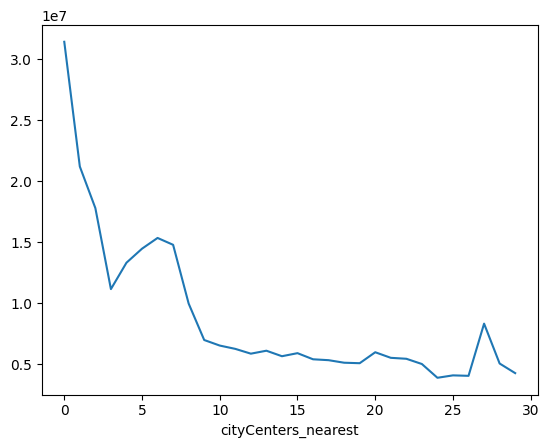

In [471]:
# код ревьюера
spb_cityCenter = data.loc[data['new_locality_name'] == 'санкт-петербург']
spb_cityCenter.groupby('cityCenters_nearest')['last_price'].mean().plot(); 

Делаем вывод, что чем ближе квартира к центру, тем выше ее цена.





<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

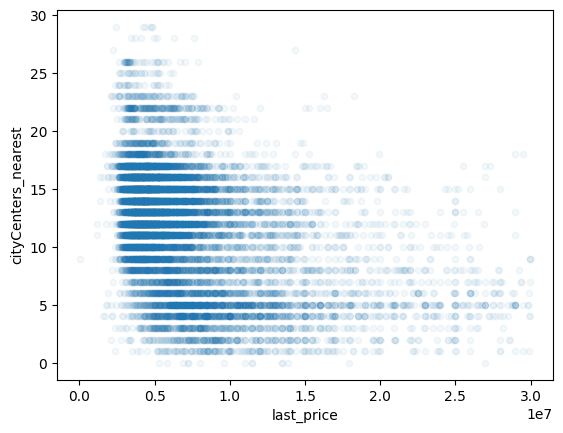

In [472]:
data_spb = data_spb.query('last_price < 30000000')
data_spb.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.05)

**Выводы по п. 4.5**

1. При приближении к центру стоимость квартир растёт.
2. Наибольшая концентрация квартир в диапазоне 9-18 км от цента при ценах от 4-х до 10-ти миллионов рублей.
3. Нет квартир за стоимость более 20 миллионов на расстоянии более 25 километров (правый верхний угол точечной диаграммы пуст)

### Общий вывод

1. Было проведено исследование данных сервиса по поиску недвижимости в городе Санкт-Петербурге и его пригородам.\
Восстановлены некоторые данные, убраны пропуски и нереалистичные значения.\
Рассчитаны новые столбцы для анализа.
2. Проведено исследование данных, в хоже которых выяснили:
    - Цена больше всего зависит от общей площади, далее от жилой площади, площади кухни и количества комнат. Остальные параметры влияют незначительно.
    - Стоимость с удалением от центра города возрастает
    - Наиболее дорогие квартиры в Санкт-Петербурге, далее в населенных находящихся поблизости: например в Мурино и т.п.